In [1]:
# Step 1: Import Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.utils import to_categorical

In [2]:
# Step 2: Load MNIST Dataset
# You can use keras built-in dataset (no need to manually download from Kaggle)
from tensorflow.keras.datasets import mnist

(X_train, y_train), (X_test, y_test) = mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


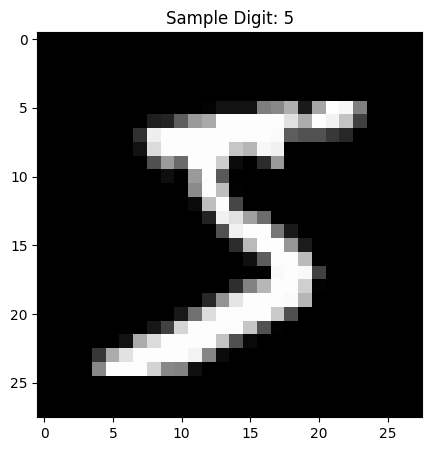

In [3]:
# Step 3: Display sample data
plt.figure(figsize=(5,5))
plt.imshow(X_train[0], cmap='gray')
plt.title(f"Sample Digit: {y_train[0]}")
plt.show()


In [4]:
# Step 4: Convert data to NumPy arrays (Array Implementation)
print("Type of X_train:", type(X_train))
print("Shape of X_train:", X_train.shape)

Type of X_train: <class 'numpy.ndarray'>
Shape of X_train: (60000, 28, 28)


In [5]:
# Step 5: Normalize the data
X_train = X_train / 255.0
X_test = X_test / 255.0

In [6]:
# Step 6: One-hot encode the labels
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

In [7]:
# Step 7: Build ANN Model
model = Sequential([
    Flatten(input_shape=(28,28)),
    Dense(128, activation='relu'),
    Dense(64, activation='relu'),
    Dense(10, activation='softmax')
])


/usr/local/lib/python3.12/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [8]:
# Step 8: Compile Model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [9]:
# Step 9: Train Model
history = model.fit(X_train, y_train, validation_split=0.2, epochs=5, batch_size=128)


Epoch 1/5
375/375 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.8020 - loss: 0.6960 - val_accuracy: 0.9499 - val_loss: 0.1822
Epoch 2/5
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.9518 - loss: 0.1622 - val_accuracy: 0.9631 - val_loss: 0.1263
Epoch 3/5
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.9670 - loss: 0.1121 - val_accuracy: 0.9671 - val_loss: 0.1105
Epoch 4/5
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.9763 - loss: 0.0796 - val_accuracy: 0.9696 - val_loss: 0.1009
Epoch 5/5
375/375 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.9832 - loss: 0.0597 - val_accuracy: 0.9696 - val_loss: 0.0977


In [10]:
# Step 10: Evaluate Model
test_loss, test_acc = model.evaluate(X_test, y_test)
print(f"\nTest Accuracy: {test_acc*100:.2f}%")

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9679 - loss: 0.0974

Test Accuracy: 97.26%


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step


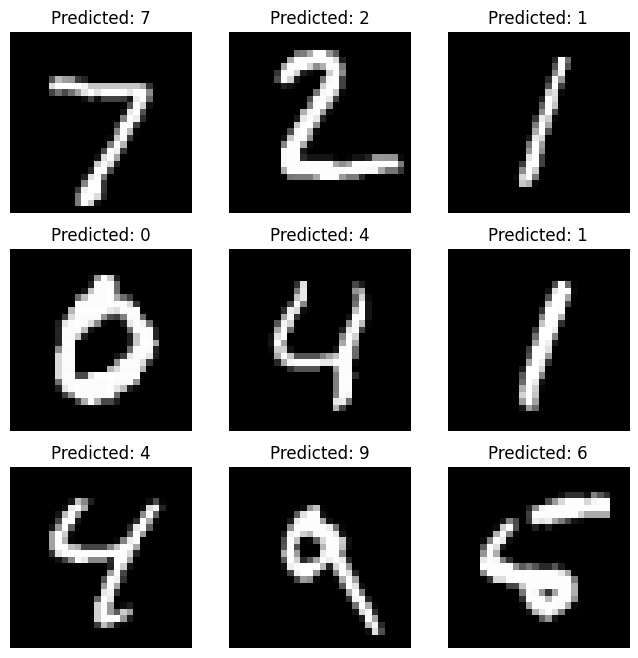

In [11]:
# Step 11: Predict and visualize
predictions = model.predict(X_test[:9])

plt.figure(figsize=(8,8))
for i in range(9):
    plt.subplot(3,3,i+1)
    plt.imshow(X_test[i], cmap='gray')
    plt.title(f"Predicted: {np.argmax(predictions[i])}")
    plt.axis('off')
plt.show()


In [12]:
# Step 12: Save results to CSV using Pandas
results_df = pd.DataFrame({
    'Actual': np.argmax(y_test[:100], axis=1),
    'Predicted': np.argmax(model.predict(X_test[:100]), axis=1)
})
results_df.to_csv('mnist_results.csv', index=False)
print("Results saved to mnist_results.csv")

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
Results saved to mnist_results.csv
